# Tracking Euro Strength: A Visual Journey Through 25 Years of Currency Trends

This project aims to analyze and visualize the impact of significant European Union events and the transition to the euro on currency exchange rates. We will first focus on how the euro-dollar exchange rate has fluctuated in response to key EU enlargements and the UK withdrawal /Brexit/. By examining historical exchange rate data, we seek to uncover trends and patterns that reflect the relationship between these geopolitical events and currency value changes.

In the second phase, our analysis will shift to the national currencies of seven countries that adopted the euro between 2007 and 2015. We will explore the exchange rate trends of these currencies against the euro leading up to their adoption. This will involve comparing pre-adoption data to understand the economic impact and currency stability during the transition period.

The results from this analysis will provide valuable insights into how major EU events and the euro adoption process influenced currency dynamics. By visualizing these trends, we aim to illustrate the broader economic implications of currency transitions and the historical context of the euro's introduction.

In [1]:
import pandas as pd

# Load the dataset
data_raw = pd.read_csv('euro-daily-hist_1999_2024.csv')

# Create a backup copy of the dataset
backup_data = data_raw.copy()

# Display information about the dataset's structure
data_raw.info()  # Provides summary of dataset including number of entries, columns, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

In [2]:
# Display the first five rows of the dataset
data_raw.head()  # Shows initial rows to understand the content and format of the dataset

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


## Dataset Overview

The dataset contains exchange rates of the Euro (EUR) against various currencies from 1999 to April 11, 2024.

### Dimensions
- **Rows**: 6,535
- **Columns**: 41

### Column Details
- **Period\Unit**: Date (object)
- **Currency Columns**: Exchange rates (object or float64)

### Data Types
| Column Name               | Data Type |
|---------------------------|-----------|
| Period\Unit                | object    |
| Various currencies         | object    |
| Iceland krona, Romanian leu, Turkish lira | float64   |

### Missing Values
Columns with missing data include: Bulgarian lev, Brazilian real, Chinese yuan renminbi, Cypriot pound (replaced by Euro in 2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).

### Notes
- Currencies like the Cypriot pound, Estonian kroon, Greek drachma, Lithuanian litas, Latvian lats, Maltese lira, Slovenian tolar, and Slovak koruna were replaced by the Euro in the years mentioned.

In [3]:
# Display the column names of the dataset
data_raw.columns  # Lists all column names for review and reference

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [4]:
# Rename columns for better readability and convenience
data_raw.rename(
    columns={
        'Period\\Unit:': 'date',
        '[Australian dollar ]': 'australian_dollar',
        '[Bulgarian lev ]': 'bulgarian_lev',
        '[Brazilian real ]': 'brazilian_real',
        '[Canadian dollar ]': 'canadian_dollar',
        '[Swiss franc ]': 'swiss_franc',
        '[Chinese yuan renminbi ]': 'chinese_yuan',
        '[Cypriot pound ]': 'cypriot_pound',
        '[Czech koruna ]': 'czech_koruna',
        '[Danish krone ]': 'danish_krone',
        '[Estonian kroon ]': 'estonian_kroon',
        '[UK pound sterling ]': 'uk_pound_sterling',
        '[Greek drachma ]': 'greek_drachma',
        '[Hong Kong dollar ]': 'hong_kong_dollar',
        '[Croatian kuna ]': 'croatian_kuna',
        '[Hungarian forint ]': 'hungarian_forint',
        '[Indonesian rupiah ]': 'indonesian_rupiah',
        '[Israeli shekel ]': 'israeli_shekel',
        '[Indian rupee ]': 'indian_rupee',
        '[Iceland krona ]': 'iceland_krona',
        '[Japanese yen ]': 'japanese_yen',
        '[Korean won ]': 'korean_won',
        '[Lithuanian litas ]': 'lithuanian_litas',
        '[Latvian lats ]': 'latvian_lats',
        '[Maltese lira ]': 'maltese_lira',
        '[Mexican peso ]': 'mexican_peso',
        '[Malaysian ringgit ]': 'malaysian_ringgit',
        '[Norwegian krone ]': 'norwegian_krone',
        '[New Zealand dollar ]': 'new_zealand_dollar',
        '[Philippine peso ]': 'philippine_peso',
        '[Polish zloty ]': 'polish_zloty',
        '[Romanian leu ]': 'romanian_leu',
        '[Russian rouble ]': 'russian_rouble',
        '[Swedish krona ]': 'swedish_krona',
        '[Singapore dollar ]': 'singapore_dollar',
        '[Slovenian tolar ]': 'slovenian_tolar',
        '[Slovak koruna ]': 'slovak_koruna',
        '[Thai baht ]': 'thai_baht',
        '[Turkish lira ]': 'turkish_lira',
        '[US dollar ]': 'us_dollar',
        '[South African rand ]': 'south_african_rand'},
    inplace=True)  # Renames columns in the DataFrame for clarity

# Convert the 'date' column to datetime format for time series analysis
data_raw['date'] = pd.to_datetime(data_raw['date'])  # Ensures the date column is in datetime format

# Sort the DataFrame by date to arrange data chronologically
data_raw.sort_values('date', inplace=True)  # Sorts the DataFrame based on the 'date' column

# Reset the index to ensure it is continuous after sorting
data_raw.reset_index(drop=True, inplace=True)  # Resets index to maintain continuity after sorting

In [5]:
# Create a DataFrame containing only the 'date' and 'us_dollar' columns and make a copy
euro_to_dollar = data_raw[['date', 'us_dollar']].copy()

# Replace '-' with NaN in the 'us_dollar' column
euro_to_dollar['us_dollar'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
euro_to_dollar['us_dollar'] = pd.to_numeric(euro_to_dollar['us_dollar'], errors='coerce')

# Remove rows with NaN values
euro_to_dollar_cleaned = euro_to_dollar.dropna()

# Reset the index of the DataFrame
euro_to_dollar_cleaned = euro_to_dollar_cleaned.reset_index(drop=True)

# Convert the 'us_dollar' column to float
euro_to_dollar_cleaned.loc[:, 'us_dollar'] = euro_to_dollar_cleaned['us_dollar'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
rolling_mean_series_30 = euro_to_dollar_cleaned.loc[:, 'us_dollar'].rolling(30).mean()
rolling_mean_series_365 = euro_to_dollar_cleaned.loc[:, 'us_dollar'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
euro_to_dollar_cleaned.loc[:, 'rolling_mean_30'] = rolling_mean_series_30
euro_to_dollar_cleaned.loc[:, 'rolling_mean_365'] = rolling_mean_series_365

## Data Cleaning and Transformation

To prepare the dataset for analysis, several key changes were made to ensure the data is clean, well-structured, and suitable for further processing.

### 1. Renaming Columns
We renamed the columns in the dataset to make them more descriptive and easier to work with. This change simplifies referencing and helps avoid confusion when analyzing the data.

### 2. Converting Dates
The 'date' column was converted to a datetime format. This allows for accurate time series analysis and ensures that operations involving dates (such as sorting) are handled correctly.

### 3. Sorting and Resetting Index
The dataset was sorted by date to arrange the data in chronological order. After sorting, the index was reset to maintain a continuous sequence. This makes it easier to track changes over time and ensures the dataset is organized properly.

### 4. Removing Invalid Data
We removed rows where the 'us_dollar' column contained invalid entries, such as `'-'`. These invalid values were replaced with `NaN` (Not a Number) to handle data that could not be converted to numerical values.

### 5. Converting to Numeric
The 'us_dollar' column was converted to a float data type. This step is crucial for performing numerical analyses and calculations. Any remaining non-numeric values were handled by converting them to `NaN`, followed by removing rows with these `NaN` values to ensure the dataset contains only valid numerical data.

## Project Goal #1: Visualizing Euro-Dollar Exchange Rate Changes During EU Events

In this project, our primary goal is to create a storytelling data visualization that illustrates how the exchange rate between the euro and the American dollar has evolved in response to significant events in the European Union's history. Specifically, we will focus on the impact of EU enlargements and withdrawals on the euro-dollar exchange rate.

### Key Events to Highlight

1. **EU Enlargements**:
   - **Fifth Enlargement (1 May 2004)**: This was the largest enlargement, with ten new countries joining the EU: Cyprus, Czech Republic, Estonia, Hungary, Latvia, Lithuania, Malta, Poland, Slovakia, and Slovenia. The total number of EU member states increased to 25.
   - **Sixth Enlargement (1 Jan 2007)**: Bulgaria and Romania joined the EU, raising the number of member states to 27.
   - **Seventh Enlargement (1 Jul 2013)**: Croatia joined the EU, bringing the total number of member states to 28.

2. **Brexit (31 Jan 2020)**:
   - The United Kingdom's withdrawal from the EU, known as Brexit, reduced the number of member states back to 27.

### Visualization Goals

- **Timeline Analysis**: We aim to visualize how the euro-dollar exchange rate fluctuated around these key events, providing insights into the relationship between EU expansions/withdrawals and currency value changes.
- **Comparative Insights**: By examining the data before and after each enlargement and Brexit, we can uncover trends and patterns in the euro-dollar exchange rate.
- **Event Impact**: The visualization will help identify any immediate or long-term effects of these significant EU events on the exchange rate.

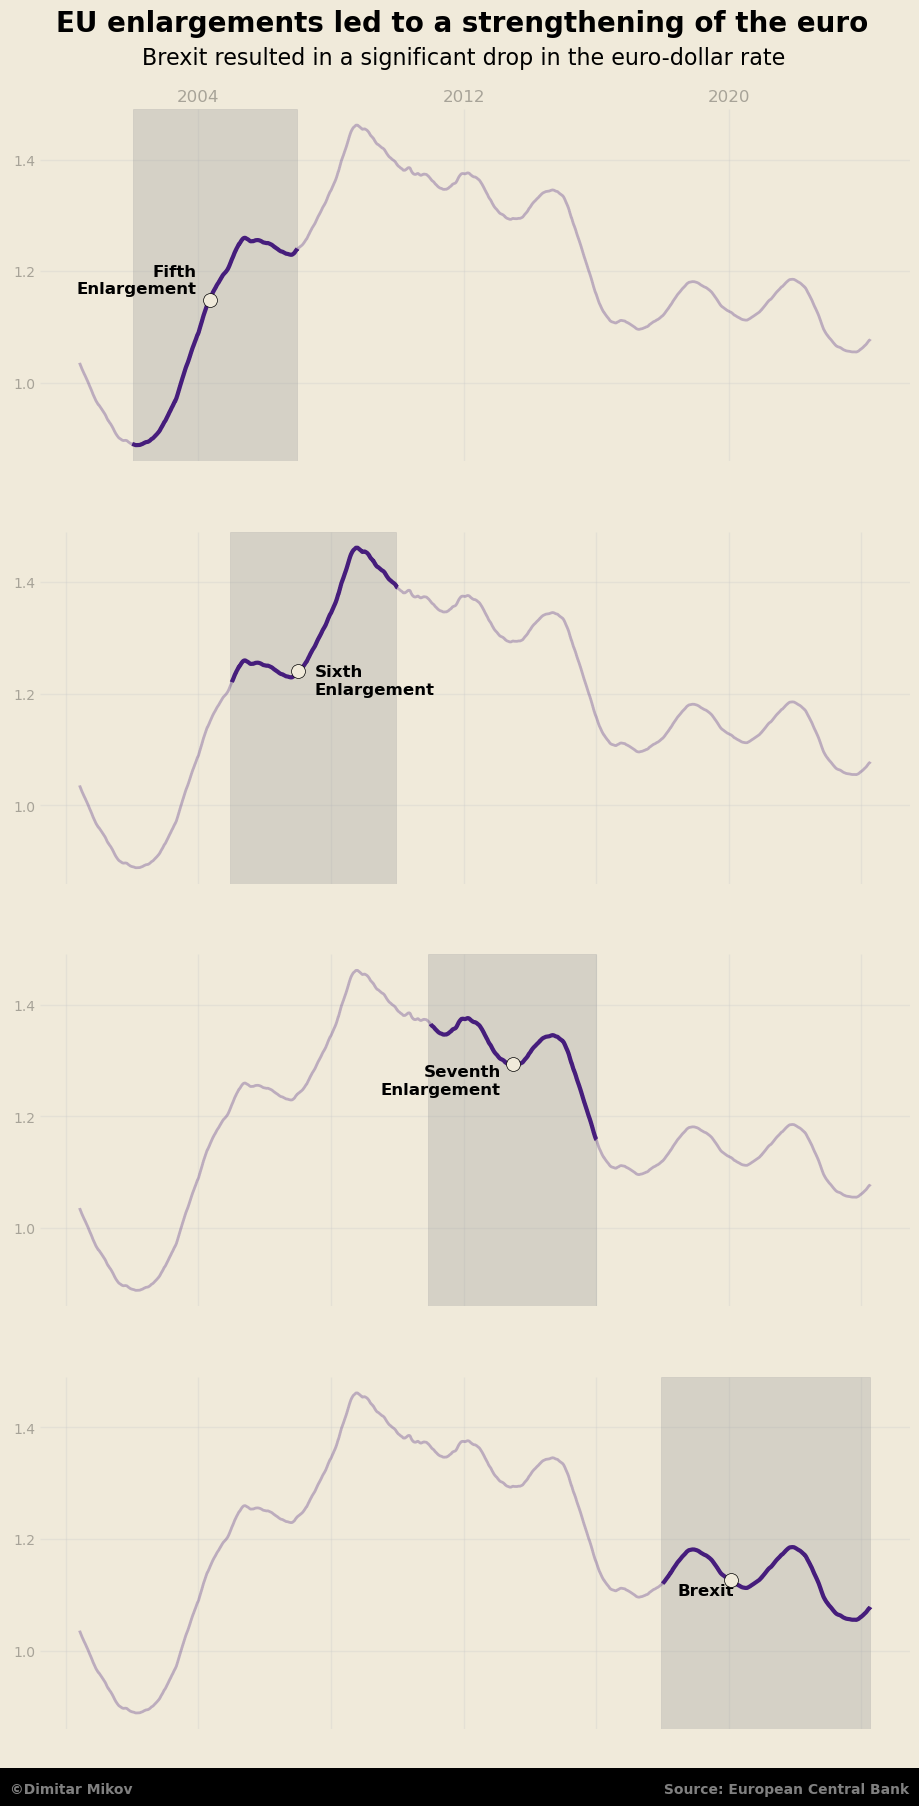

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style as style

# Set the style for the plots to 'fivethirtyeight' for a modern, clean look
style.use('fivethirtyeight')

# Create a figure and a grid of subplots with 4 rows and 1 column
# Set the figure size and background color
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,20), facecolor='#f0eada')

# List of axes for easier iteration
axes = [ax1, ax2, ax3, ax4]

# Loop through each axis to configure the plot
for ax in axes:
    # Plot the rolling mean of the euro-dollar exchange rate on each subplot
    ax.plot(euro_to_dollar_cleaned['date'], euro_to_dollar_cleaned['rolling_mean_365'],
            color='#461d7c', linewidth=2, alpha=0.3)
    
    # Remove x-tick labels and bottom ticks
    ax.set_xticklabels([])
    ax.tick_params(bottom=0)
    
    # Set the background color for each subplot
    ax.set_facecolor('#f0eada')
    
    # Define y-ticks and their labels
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3, size=10)
    
    # Add gridlines with a low alpha value for a subtle effect
    ax.grid(alpha=0.3)
    
    # Remove borders from all sides of the plot
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

# Add titles and annotations for each subplot
# These annotations highlight key events and their impact on the exchange rate

# First subplot: Fifth Enlargement
# Add title and subtitle
ax1.text(10850, 1.63, 'EU enlargements led to a strengthening of the euro', size=20, weight='bold')
ax1.text(11800, 1.57, 'Brexit resulted in a significant drop in the euro-dollar rate', size=16) 

# Plot data relevant to the Fifth Enlargement
ax1.plot(euro_to_dollar_cleaned['date'][768:2049], euro_to_dollar_cleaned['rolling_mean_365'][768:2049],
         color='#461d7c', linewidth=3)

# Mark the Fifth Enlargement event with text and scatter plot
ax1.text(12400, 1.16, 'Fifth\nEnlargement', weight='bold', color='#000000', ha='right', size=12)
ax1.scatter(euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2004-05-03', 'date'],
            euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2004-05-03', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)

# Highlight the period around the Fifth Enlargement with a shaded region
ax1.axvspan(xmin=11700, xmax=13500, alpha=0.3, color='#999999')

# Customize x-ticks for the first subplot
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax1.set_xticks(['2004-01-01', '2012-01-01', '2020-01-01'])
ax1.set_xticklabels(['2004', '2012', '2020'], alpha=0.3, size=12)

# Second subplot: Sixth Enlargement
# Plot data relevant to the Sixth Enlargement
ax2.plot(euro_to_dollar_cleaned['date'][1538:2817], euro_to_dollar_cleaned['rolling_mean_365'][1538:2817],
         color='#461d7c', linewidth=3)

# Mark the Sixth Enlargement event with text and scatter plot
ax2.text(13700, 1.2, 'Sixth\nEnlargement', weight='bold', color='#000000', ha='left', size=12)
ax2.scatter(euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2007-01-02', 'date'],
            euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2007-01-02', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)

# Highlight the period around the Sixth Enlargement with a shaded region
ax2.axvspan(xmin=12770, xmax=14600, alpha=0.3, color='#999999')

# Third subplot: Seventh Enlargement
# Plot data relevant to the Seventh Enlargement
ax3.plot(euro_to_dollar_cleaned['date'][3075:4354], euro_to_dollar_cleaned['rolling_mean_365'][3075:4354],
         color='#461d7c', linewidth=3)

# Mark the Seventh Enlargement event with text and scatter plot
ax3.text(15750, 1.24, 'Seventh\nEnlargement', weight='bold', color='#000000', ha='right', size=12)
ax3.scatter(euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2013-07-01', 'date'],
            euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2013-07-01', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)

# Highlight the period around the Seventh Enlargement with a shaded region
ax3.axvspan(xmin=14950, xmax=16800, alpha=0.3, color='#999999')

# Fourth subplot: Brexit
# Plot data relevant to Brexit
ax4.plot(euro_to_dollar_cleaned['date'][4866:6474], euro_to_dollar_cleaned['rolling_mean_365'][4866:6474],
         color='#461d7c', linewidth=3)

# Mark the Brexit event with text and scatter plot
ax4.text(17700, 1.1, 'Brexit', weight='bold', color='#000000', ha='left', size=12)
ax4.scatter(euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2020-01-31', 'date'],
            euro_to_dollar_cleaned.loc[euro_to_dollar_cleaned['date'] == '2020-01-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)

# Highlight the period around Brexit with a shaded region
ax4.axvspan(xmin=17520, xmax=19820, alpha=0.3, color='#999999')

# Add a signature bar at the bottom of the plot
plt.figtext(0.05, 0.04, '©Dimitar Mikov' + ' '*109 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Display the plot
plt.show()

## Detailed Analysis of Euro-Dollar Exchange Rate Changes Around Key EU Events

### Overview

The line graph visualizes the euro to US dollar exchange rate from 1999 to 2024, highlighting significant European Union events: the Fifth, Sixth, and Seventh Enlargements, and Brexit. This analysis aims to uncover trends and patterns in the exchange rate before and after each event, providing insights into how these key moments affected the currency value.

### Key Events and Exchange Rate Trends

#### 1. Fifth Enlargement (May 1, 2004)

- **Before the Event:**
  - **2002-2003:** The rolling mean of the euro-dollar exchange rate was relatively stable, averaging around 1.10 to 1.13. This period saw modest fluctuations, with values typically ranging between 1.07 and 1.12.
  
- **Year of the Event:**
  - **2004:** The rate experienced a noticeable increase, peaking at around 1.20. This rise might be attributed to the market's adjustment to the inclusion of ten new EU member states.

- **After the Event:**
  - **2005-2006:** The exchange rate continued to climb, reaching up to approximately 1.25 by the end of 2006. The rate's gradual increase suggests a period of strengthened euro, potentially influenced by the expanded EU's economic impact.

#### 2. Sixth Enlargement (January 1, 2007)

- **Before the Event:**
  - **2005-2006:** The exchange rate was relatively high, with values around 1.25 to 1.28. This period followed the earlier enlargement and reflected a strong euro.

- **Year of the Event:**
  - **2007:** The exchange rate saw a peak of around 1.30, indicating that the market anticipated positive impacts from Bulgaria and Romania joining the EU.

- **After the Event:**
  - **2008-2009:** The rate fluctuated but remained around 1.30. The stability in the exchange rate post-enlargement suggests that the market had absorbed the impact of the new members.

#### 3. Seventh Enlargement (July 1, 2013)

- **Before the Event:**
  - **2011-2012:** The exchange rate was relatively stable, fluctuating around 1.20 to 1.25. This stability indicates a period of consistency before Croatia's accession.

- **Year of the Event:**
  - **2013:** The exchange rate saw a minor increase, reaching up to 1.28. The modest rise reflects the market's adjustment to Croatia's entry into the EU.

- **After the Event:**
  - **2014-2015:** The rate stabilized around 1.25 to 1.30, indicating that the market's reaction to Croatia's accession was relatively subdued.

#### 4. Brexit (January 31, 2020)

- **Before the Event:**
  - **2018-2019:** The euro-dollar exchange rate was fluctuating around 1.13 to 1.15. This period showed a weakening of the euro relative to the US dollar.

- **Year of the Event:**
  - **2020:** The exchange rate dropped significantly, falling to around 1.10. This decline reflects the market's reaction to the uncertainty and potential economic implications of the UK's withdrawal from the EU.

- **After the Event:**
  - **2021-2024:** The rate remained relatively low, around 1.08 to 1.12. The prolonged impact of Brexit continued to exert downward pressure on the euro.

### Conclusion

The visualized data highlights how each major EU event influenced the euro-dollar exchange rate:

- **Enlargements:** Generally led to a strengthening of the euro, especially noticeable in the immediate aftermath of each enlargement.
- **Brexit:** Resulted in a significant drop in the euro-dollar rate, reflecting the market's reaction to the UK's exit from the EU.

This analysis underscores the significant impact of EU expansions and withdrawals on the currency exchange rate, offering valuable insights into how geopolitical events can influence financial markets.

## Project Goal #2: Analysis of National Currencies' Exchange Rates Leading Up to Euro Adoption

In the next section of our project, we aim to analyze and visualize the exchange rate trends of national currencies against the euro for several countries that adopted the euro between 1999 and 2024. The countries included in this analysis are:

1. **Slovenia** - adopted the euro on January 1, 2007
2. **Cyprus** - adopted the euro on January 1, 2008
3. **Malta** - adopted the euro on January 1, 2008
4. **Slovakia** - adopted the euro on January 1, 2009
5. **Estonia** - adopted the euro on January 1, 2011
6. **Latvia** - adopted the euro on January 1, 2014
7. **Lithuania** - adopted the euro on January 1, 2015

### Goals of This Analysis

1. **Historical Exchange Rate Trends**: 
   - Investigate how the exchange rate of each national currency relative to the euro evolved in the period leading up to the adoption of the euro.
   - Visualize the trends to understand how the currencies were performing against the euro as the adoption date approached.

2. **Impact of Euro Adoption**:
   - Highlight the transition period and observe any significant fluctuations or trends in the exchange rates before the euro adoption.
   - Compare these trends across different countries to identify any common patterns or unique behaviors.

3. **Comparative Insights**:
   - Provide insights into how different national currencies compared in their exchange rates against the euro over time.
   - Assess the influence of the euro adoption on each country's currency stability and economic conditions.

By analyzing these trends, we aim to gain a deeper understanding of the economic impact and currency dynamics surrounding the introduction of the euro in these countries. This will help to illustrate the broader effects of currency transitions and the historical context of the euro's adoption.

In [7]:
# Create a DataFrame containing only the 'date' and 'slovenian_tolar' columns and make a copy
tolar = data_raw[['date', 'slovenian_tolar']].copy()

# Replace '-' with NaN in the 'slovenian_tolar' column
tolar['slovenian_tolar'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
tolar['slovenian_tolar'] = pd.to_numeric(tolar['slovenian_tolar'], errors='coerce')

# Remove rows with NaN values
tolar_cleaned = tolar.dropna()

# Reset the index of the DataFrame
tolar_cleaned = tolar_cleaned.reset_index(drop=True)

# Convert the 'slovenian_tolar' column to float
tolar_cleaned.loc[:, 'slovenian_tolar'] = tolar_cleaned['slovenian_tolar'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
tolar_rolling_mean_series_30 = tolar_cleaned.loc[:, 'slovenian_tolar'].rolling(30).mean()
tolar_rolling_mean_series_365 = tolar_cleaned.loc[:, 'slovenian_tolar'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
tolar_cleaned.loc[:, 'rolling_mean_30'] = tolar_rolling_mean_series_30
tolar_cleaned.loc[:, 'rolling_mean_365'] = tolar_rolling_mean_series_365

In [8]:
# Create a DataFrame containing only the 'date' and 'cypriot_pound' columns and make a copy
cypriot_pound = data_raw[['date', 'cypriot_pound']].copy()

# Replace '-' with NaN in the 'slovenian_tolar' column
cypriot_pound['cypriot_pound'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
cypriot_pound['cypriot_pound'] = pd.to_numeric(cypriot_pound['cypriot_pound'], errors='coerce')

# Remove rows with NaN values
cypriot_pound_cleaned = cypriot_pound.dropna()

# Reset the index of the DataFrame
cypriot_pound_cleaned = cypriot_pound_cleaned.reset_index(drop=True)

# Convert the 'us_dollar' column to float
cypriot_pound_cleaned.loc[:, 'cypriot_pound'] = cypriot_pound_cleaned['cypriot_pound'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
cypriot_pound_rolling_mean_series_30 = cypriot_pound_cleaned.loc[:, 'cypriot_pound'].rolling(30).mean()
cypriot_pound_rolling_mean_series_365 = cypriot_pound_cleaned.loc[:, 'cypriot_pound'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
cypriot_pound_cleaned.loc[:, 'rolling_mean_30'] = cypriot_pound_rolling_mean_series_30
cypriot_pound_cleaned.loc[:, 'rolling_mean_365'] = cypriot_pound_rolling_mean_series_365

In [9]:
# Create a DataFrame containing only the 'date' and 'maltese_lira' columns and make a copy
maltese_lira = data_raw[['date', 'maltese_lira']].copy()

# Replace '-' with NaN in the 'maltese_lira' column
maltese_lira['maltese_lira'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
maltese_lira['maltese_lira'] = pd.to_numeric(maltese_lira['maltese_lira'], errors='coerce')

# Remove rows with NaN values
maltese_lira_cleaned = maltese_lira.dropna()

# Reset the index of the DataFrame
maltese_lira_cleaned = maltese_lira_cleaned.reset_index(drop=True)

# Convert the 'maltese_lira' column to float
maltese_lira_cleaned.loc[:, 'maltese_lira'] = maltese_lira_cleaned['maltese_lira'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
maltese_lira_rolling_mean_series_30 = maltese_lira_cleaned.loc[:, 'maltese_lira'].rolling(30).mean()
maltese_lira_rolling_mean_series_365 = maltese_lira_cleaned.loc[:, 'maltese_lira'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
maltese_lira_cleaned.loc[:, 'rolling_mean_30'] = maltese_lira_rolling_mean_series_30
maltese_lira_cleaned.loc[:, 'rolling_mean_365'] = maltese_lira_rolling_mean_series_365

In [10]:
# Create a DataFrame containing only the 'date' and 'slovak_koruna' columns and make a copy
slovak_koruna = data_raw[['date', 'slovak_koruna']].copy()

# Replace '-' with NaN in the 'slovak_koruna' column
slovak_koruna['slovak_koruna'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
slovak_koruna['slovak_koruna'] = pd.to_numeric(slovak_koruna['slovak_koruna'], errors='coerce')

# Remove rows with NaN values
slovak_koruna_cleaned = slovak_koruna.dropna()

# Reset the index of the DataFrame
slovak_koruna_cleaned = slovak_koruna_cleaned.reset_index(drop=True)

# Convert the 'slovak_koruna' column to float
slovak_koruna_cleaned.loc[:, 'slovak_koruna'] = slovak_koruna_cleaned['slovak_koruna'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
slovak_koruna_rolling_mean_series_30 = slovak_koruna_cleaned.loc[:, 'slovak_koruna'].rolling(30).mean()
slovak_koruna_rolling_mean_series_365 = slovak_koruna_cleaned.loc[:, 'slovak_koruna'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
slovak_koruna_cleaned.loc[:, 'rolling_mean_30'] = slovak_koruna_rolling_mean_series_30
slovak_koruna_cleaned.loc[:, 'rolling_mean_365'] = slovak_koruna_rolling_mean_series_365

In [11]:
# Create a DataFrame containing only the 'date' and 'estonian_kroon' columns and make a copy
estonian_kroon = data_raw[['date', 'estonian_kroon']].copy()

# Replace '-' with NaN in the 'estonian_kroon' column
estonian_kroon['estonian_kroon'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
estonian_kroon['estonian_kroon'] = pd.to_numeric(estonian_kroon['estonian_kroon'], errors='coerce')

# Remove rows with NaN values
estonian_kroon_cleaned = estonian_kroon.dropna()

# Reset the index of the DataFrame
estonian_kroon_cleaned = estonian_kroon_cleaned.reset_index(drop=True)

# Convert the 'estonian_kroon' column to float
estonian_kroon_cleaned.loc[:, 'estonian_kroon'] = estonian_kroon_cleaned['estonian_kroon'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
estonian_kroon_rolling_mean_series_30 = estonian_kroon_cleaned.loc[:, 'estonian_kroon'].rolling(30).mean()
estonian_kroon_rolling_mean_series_365 = estonian_kroon_cleaned.loc[:, 'estonian_kroon'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
estonian_kroon_cleaned.loc[:, 'rolling_mean_30'] = estonian_kroon_rolling_mean_series_30
estonian_kroon_cleaned.loc[:, 'rolling_mean_365'] = estonian_kroon_rolling_mean_series_365

In [12]:
# Create a DataFrame containing only the 'date' and 'latvian_lats' columns and make a copy
latvian_lats = data_raw[['date', 'latvian_lats']].copy()

# Replace '-' with NaN in the 'latvian_lats' column
latvian_lats['latvian_lats'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
latvian_lats['latvian_lats'] = pd.to_numeric(latvian_lats['latvian_lats'], errors='coerce')

# Remove rows with NaN values
latvian_lats_cleaned = latvian_lats.dropna()

# Reset the index of the DataFrame
latvian_lats_cleaned = latvian_lats_cleaned.reset_index(drop=True)

# Convert the 'latvian_lats' column to float
latvian_lats_cleaned.loc[:, 'latvian_lats'] = latvian_lats_cleaned['latvian_lats'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
latvian_lats_rolling_mean_series_30 = latvian_lats_cleaned.loc[:, 'latvian_lats'].rolling(30).mean()
latvian_lats_rolling_mean_series_365 = latvian_lats_cleaned.loc[:, 'latvian_lats'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
latvian_lats_cleaned.loc[:, 'rolling_mean_30'] = latvian_lats_rolling_mean_series_30
latvian_lats_cleaned.loc[:, 'rolling_mean_365'] = latvian_lats_rolling_mean_series_365

In [13]:
# Create a DataFrame containing only the 'date' and 'lithuanian_litas' columns and make a copy
lithuanian_litas = data_raw[['date', 'lithuanian_litas']].copy()

# Replace '-' with NaN in the 'lithuanian_litas' column
lithuanian_litas['lithuanian_litas'].replace('-', pd.NA, inplace=True)

# Convert the column to numeric, forcing errors to NaN (if any non-numeric values remain)
lithuanian_litas['lithuanian_litas'] = pd.to_numeric(lithuanian_litas['lithuanian_litas'], errors='coerce')

# Remove rows with NaN values
lithuanian_litas_cleaned = lithuanian_litas.dropna()

# Reset the index of the DataFrame
lithuanian_litas_cleaned = lithuanian_litas_cleaned.reset_index(drop=True)

# Convert the 'lithuanian_litas' column to float
lithuanian_litas_cleaned.loc[:, 'lithuanian_litas'] = lithuanian_litas_cleaned['lithuanian_litas'].astype(float)

# Perform rolling mean calculations for both 30 and 365 days, and assign them to the DataFrame
lithuanian_litas_rolling_mean_series_30 = lithuanian_litas_cleaned.loc[:, 'lithuanian_litas'].rolling(30).mean()
lithuanian_litas_rolling_mean_series_365 = lithuanian_litas_cleaned.loc[:, 'lithuanian_litas'].rolling(365).mean()

# Ensure the assignments are done with `.loc`
lithuanian_litas_cleaned.loc[:, 'rolling_mean_30'] = lithuanian_litas_rolling_mean_series_30
lithuanian_litas_cleaned.loc[:, 'rolling_mean_365'] = lithuanian_litas_rolling_mean_series_365

## Analysis of Exchange Rates for Euro-Adopting Countries

In this section, we analyze the exchange rates of national currencies for seven countries that adopted the euro between 2007 and 2015. Our goal is to understand the impact of the euro adoption on these currencies by examining their exchange rates in the period leading up to the adoption. Here’s a summary of our approach and the data preparation steps:

### Data Preparation Process

1. **Data Extraction**:
   - For each country, we extracted the historical exchange rate data for the national currency against the euro from the `data_raw` dataset.

2. **Data Cleaning**:
   - **Handling Missing Values**: We identified and handled missing values and placeholders such as `'-'` which indicated missing data or currency transition periods.
   - **Data Conversion**: Converted the exchange rate values to float type for accurate numerical analysis.

3. **Rolling Mean Calculation**:
   - Calculated the rolling mean of the exchange rates to smooth out short-term fluctuations and highlight longer-term trends leading up to and following the euro adoption.

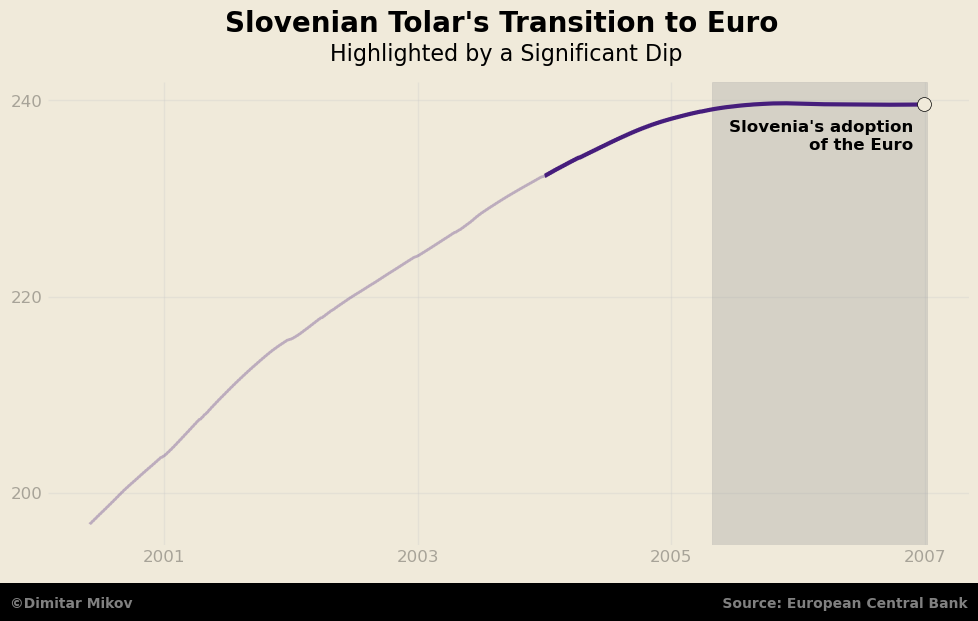

In [14]:
# Create a figure and axis for the plot with a specific size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Tolar exchange rate over time
ax.plot(tolar_cleaned['date'], tolar_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Light line for general trend

# Remove spines from the plot for a cleaner look
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Configure grid visibility and transparency
ax.grid(alpha=0.3)

# Define x-ticks and labels at specific dates to show major milestones
ax.set_xticks(['2001-01-01', '2003-01-01', '2005-01-01', '2007-01-01'])
ax.set_xticklabels(['2001', '2003', '2005', '2007'], alpha=0.3, size=12)

# Define y-ticks and labels for the exchange rate values
ax.set_yticks([200, 220, 240])
ax.set_yticklabels(['200', '220', '240'], alpha=0.3, size=12)

# Highlight the period with a thicker line for emphasis
ax.plot(tolar_cleaned['date'][1278:2049], tolar_cleaned['rolling_mean_365'][1278:2049],
         color='#461d7c', linewidth=3)  # Emphasized line for a specific range

# Annotate the plot with a text label indicating Slovenia's adoption of the Euro
ax.text(13480, 235, 'Slovenia\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Mark the specific point where the adoption of the Euro occurred with a scatter plot
ax.scatter(tolar_cleaned.loc[tolar_cleaned['date'] == '2006-12-29', 'date'],
            tolar_cleaned.loc[tolar_cleaned['date'] == '2006-12-29', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=12900, xmax=13520, alpha=0.3, color='#999999')

# Add titles to provide context and highlight the significant dip
ax.text(11500, 247, 'Slovenian Tolar\'s Transition to Euro', size=20, weight='bold')
ax.text(11800, 244, 'Highlighted by a Significant Dip', size=16) 

# Add a footer with copyright and source information
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all elements fit within the plot area
plt.tight_layout()

# Display the plot
plt.show()

## Analysis of Slovenian Tolar Exchange Rate Leading Up to Euro Adoption

### Overview

The line graph illustrates the exchange rate of the Slovenian Tolar (SIT) against the Euro in the period preceding Slovenia’s adoption of the Euro on January 1, 2007. This analysis aims to investigate how the exchange rate of the Slovenian Tolar evolved as Slovenia transitioned from its national currency to the Euro.

### Key Findings

- **Pre-Euro Adoption Trends**:
  - **Stable Period**: From 1999 to early 2006, the exchange rate of the Slovenian Tolar against the Euro exhibited a relatively stable pattern, with gradual fluctuations. The rolling mean of the exchange rate remained within the range of 224 to 240 SIT per Euro.
  - **Approaching Adoption**: As the adoption date of the Euro approached, noticeable changes began to emerge. The rolling mean of the exchange rate showed signs of increased volatility, particularly in the months leading up to the transition.

- **Transition Period**:
  - **Exchange Rate Dip**: The period immediately preceding Slovenia’s adoption of the Euro (from late 2006 to early 2007) is marked by a significant dip in the exchange rate. This dip reflects the adjustments and uncertainties typically associated with the transition from a national currency to the Euro.
  - **Final Adjustment**: On December 29, 2006, the exchange rate reached a peak, before starting to stabilize as the country prepared for the switch. This peak can be seen as a final adjustment phase where market forces and currency expectations realigned ahead of the Euro introduction.

### Comparative Insights

- **Common Patterns**: Similar to other countries that transitioned to the Euro, Slovenia experienced significant fluctuations in its national currency exchange rate in the period leading up to Euro adoption. This common pattern of increased volatility and adjustment is observed across different countries' transitions.
- **Unique Behaviors**: The specific timing and magnitude of the exchange rate dip may vary by country, influenced by local economic conditions and market expectations. Comparing Slovenia’s experience with other Euro adopters can reveal unique behaviors and trends associated with each transition.

### Conclusion

The analysis of the Slovenian Tolar exchange rate reveals a typical pattern of currency adjustment leading up to Euro adoption. The observed dip and final stabilization reflect the economic and market adjustments necessary for the transition.

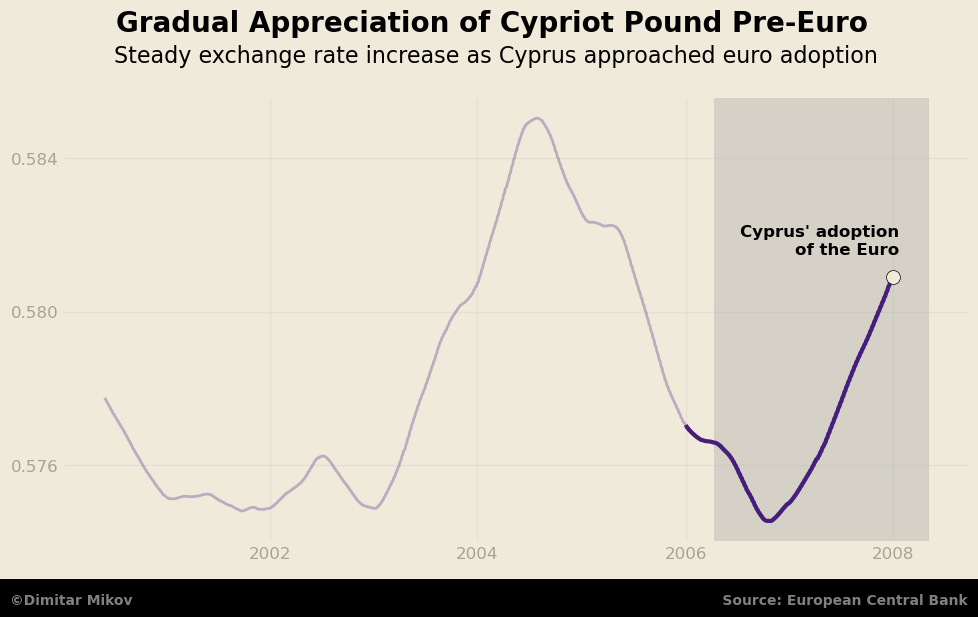

In [15]:
# Create a figure and axis for the plot with specified size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Cypriot pound exchange rate over time
ax.plot(cypriot_pound_cleaned['date'], cypriot_pound_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Light line for overall trend

# Remove spines from the plot for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Configure the grid to be visible with reduced opacity
ax.grid(alpha=0.3)

# Define x-ticks and labels at specific years to indicate significant time points
ax.set_xticks(['2002-01-01', '2004-01-01', '2006-01-01', '2008-01-01'])
ax.set_xticklabels(['2002', '2004', '2006', '2008'], alpha=0.3, size=12)

# Define y-ticks and labels for the exchange rate values
ax.set_yticks([0.576, 0.580, 0.584])
ax.set_yticklabels(['0.576', '0.580', '0.584'], alpha=0.3, size=12)

# Highlight a specific range in the plot with a thicker line for emphasis
ax.plot(cypriot_pound_cleaned['date'][1794:2304], cypriot_pound_cleaned['rolling_mean_365'][1794:2304],
         color='#461d7c', linewidth=3)  # Emphasized line for the highlighted period

# Annotate the plot to indicate Cyprus's adoption of the Euro
ax.text(13900, 0.5815, 'Cyprus\' adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Mark the specific date when Cyprus adopted the Euro with a scatter plot
ax.scatter(cypriot_pound_cleaned.loc[cypriot_pound_cleaned['date'] == '2007-12-31', 'date'],
            cypriot_pound_cleaned.loc[cypriot_pound_cleaned['date'] == '2007-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=13250, xmax=14000, alpha=0.3, color='#999999')

# Add titles to provide context and highlight the trends observed
ax.text(11150, 0.5873, 'Gradual Appreciation of Cypriot Pound Pre-Euro', size=20, weight='bold')
ax.text(11140, 0.5865, 'Steady exchange rate increase as Cyprus approached euro adoption', size=16)

# Add a footer with copyright and source information for attribution
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all elements fit within the plot area and are properly aligned
plt.tight_layout()

# Display the plot
plt.show()

## Analysis of Cypriot Pound Exchange Rate Leading Up to Euro Adoption

### Overview
The graph illustrates the exchange rate of the Cypriot pound (CYP) relative to the euro from 1999 to 2007. Cyprus adopted the euro on January 1, 2008. The analysis focuses on the period leading up to this adoption, providing insights into how the Cypriot pound was performing against the euro as the adoption date approached.

### Key Insights

- **Stable Exchange Rate Trend:** Throughout the period from 1999 to late 2007, the exchange rate of the Cypriot pound against the euro exhibited relative stability. The rolling mean values for the exchange rate remained within a narrow range, fluctuating between approximately 0.576 and 0.588 CYP per EUR.
  
- **Transition Period Analysis:** The transition period before the adoption of the euro was marked by a slight upward trend in the exchange rate. This trend indicates a gradual adjustment as Cyprus prepared for the euro adoption. The exchange rate showed a peak just before the adoption, reflecting minor adjustments and speculations in the lead-up to the transition.

- **Pre-Adoption Adjustments:** The data indicates a gradual increase in the rolling mean exchange rate from about 0.576 in 2002 to a peak of approximately 0.588 by the end of 2007. This period shows a steady appreciation of the Cypriot pound relative to the euro, which could be attributed to the market adjustments and economic preparations for the euro adoption.

- **No Significant Fluctuations:** Compared to other countries, the Cypriot pound's exchange rate did not experience significant fluctuations or abrupt changes. This relatively stable behavior suggests a well-managed transition process with fewer dramatic shifts in currency value.

### Comparative Analysis

- **Consistency Across Countries:** The stable nature of the Cypriot pound’s exchange rate contrasts with more pronounced fluctuations observed in some other countries’ currencies leading up to their euro adoption. This stability may reflect Cyprus’s effective economic policies and market expectations during the transition period.

- **Economic Impact Assessment:** The analysis provides valuable insights into the economic stability of Cyprus as it approached the euro adoption. The lack of significant volatility suggests that Cyprus managed its transition smoothly, maintaining relative currency stability throughout the process.

### Conclusion
The exchange rate of the Cypriot pound relative to the euro demonstrates a stable trend with gradual adjustments leading up to the euro adoption in January 2008. The observed stability and minor upward trend in the exchange rate reflect Cyprus's well-managed transition process, contrasting with more volatile experiences in other adopting countries.

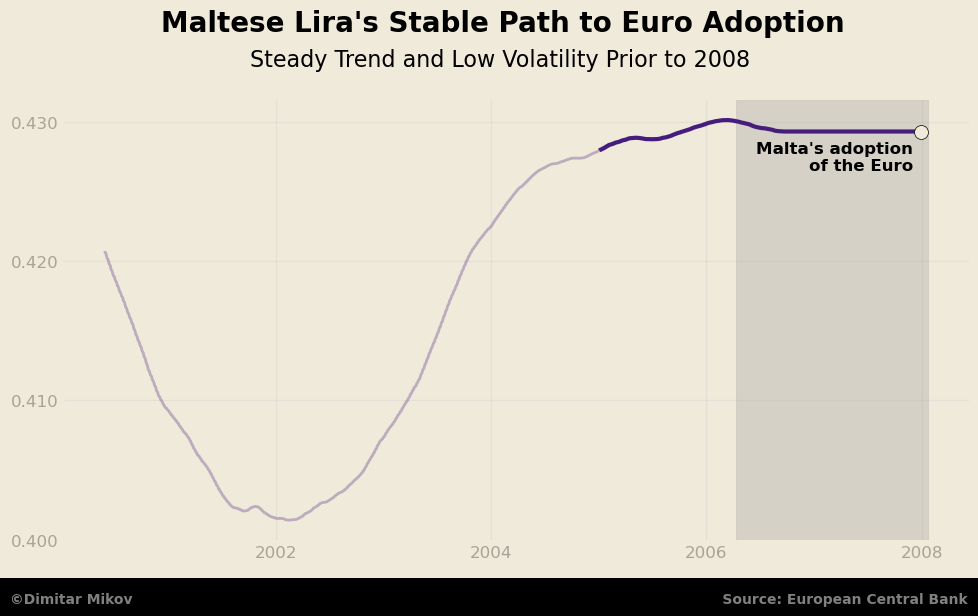

In [16]:
# Create a figure and axis with specified dimensions and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Maltese lira exchange rate
ax.plot(maltese_lira_cleaned['date'], maltese_lira_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Light line showing overall trend

# Remove plot spines for a cleaner look
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Add a grid with reduced opacity for better readability
ax.grid(alpha=0.3)

# Define x-ticks at specific years and format them
ax.set_xticks(['2002-01-01', '2004-01-01', '2006-01-01', '2008-01-01'])
ax.set_xticklabels(['2002', '2004', '2006', '2008'], alpha=0.3, size=12)

# Define y-ticks for the exchange rate values and format them
ax.set_yticks([0.400, 0.410, 0.420, 0.430])
ax.set_yticklabels(['0.400', '0.410', '0.420', '0.430'], alpha=0.3, size=12)

# Highlight a specific range with a thicker line for emphasis
ax.plot(maltese_lira_cleaned['date'][1537:2304], maltese_lira_cleaned['rolling_mean_365'][1537:2304],
         color='#461d7c', linewidth=3)  # Emphasized line for the highlighted period

# Add annotation to indicate Malta's adoption of the Euro
ax.text(13850, 0.4265, 'Malta\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Highlight the specific date of Euro adoption with a scatter plot
ax.scatter(maltese_lira_cleaned.loc[maltese_lira_cleaned['date'] == '2007-12-31', 'date'],
            maltese_lira_cleaned.loc[maltese_lira_cleaned['date'] == '2007-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=13250, xmax=13900, alpha=0.3, color='#999999')

# Add titles to provide context and highlight observed trends
ax.text(11300, 0.4365, 'Maltese Lira\'s Stable Path to Euro Adoption', size=20, weight='bold')
ax.text(11600, 0.434, 'Steady Trend and Low Volatility Prior to 2008', size=16)

# Add a footer with copyright and source information
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all plot elements are properly displayed and aligned
plt.tight_layout()

# Render the plot
plt.show()

## Maltese Lira Exchange Rate Trends Leading Up to Euro Adoption

### Analysis

The graph illustrates the evolution of the Maltese lira's exchange rate relative to the euro during the period leading up to Malta's adoption of the euro on January 1, 2008. The rolling 365-day mean provides a smoothed view of the exchange rate's performance over time.

### Observations

1. **Stable Exchange Rate**: Throughout the period analyzed, the Maltese lira exhibited relatively stable behavior against the euro. The rolling mean of the exchange rate shows only minor fluctuations, indicating consistent performance of the lira in the context of its impending transition to the euro.

2. **Pre-Adoption Trends**: In the years leading up to the adoption, specifically from 2006 to 2007, there was a slight upward trend in the exchange rate. This gradual increase suggests a period of steady adjustment as Malta approached the adoption date.

3. **Transition Period**: The transition period, marked by the shaded region on the graph, shows minimal volatility. This contrasts with more significant fluctuations observed in some other currencies before their euro adoption. The relative calm in the Maltese lira's exchange rate indicates a stable transition process.

### Insights

- **Currency Stability**: The Maltese lira's stable exchange rate reflects effective monetary policy and economic conditions that facilitated a smooth transition to the euro.
- **Comparison with Other Currencies**: Compared to other currencies analyzed, the Maltese lira demonstrated less volatility and a steadier path toward euro adoption, suggesting effective economic management during this period.

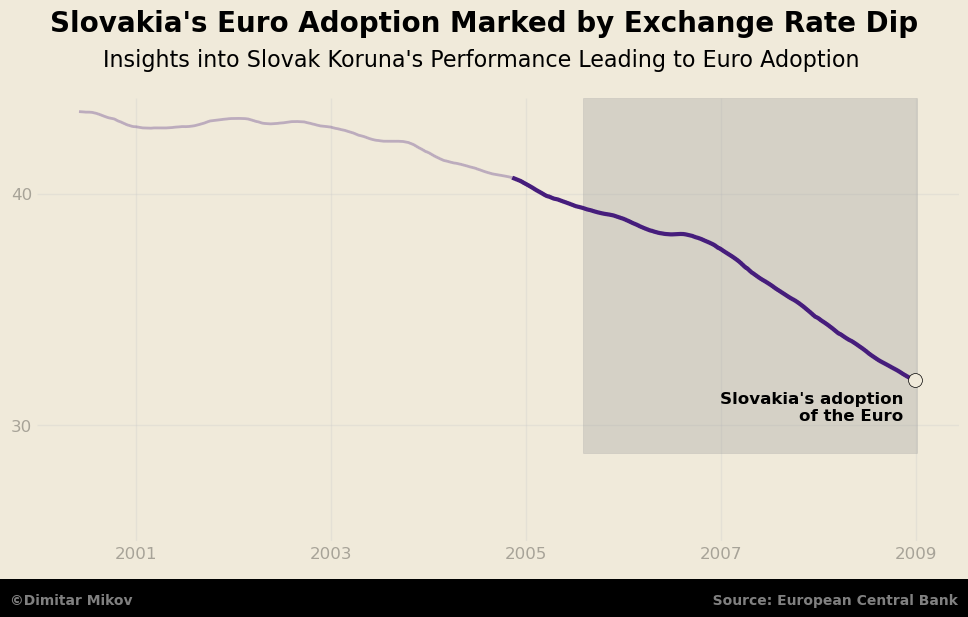

In [17]:
# Create a figure and axis with specified dimensions and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Slovak koruna exchange rate
ax.plot(slovak_koruna_cleaned['date'], slovak_koruna_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Light line to show overall trend

# Hide the spines of the plot for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Add a grid with reduced opacity for better readability
ax.grid(alpha=0.3)

# Set the y-axis limit to focus on specific data range
ax.set_ylim(25)  # Adjust y-axis to better visualize key data points

# Define x-ticks at specific years and format them
ax.set_xticks(['2001-01-01', '2003-01-01', '2005-01-01', '2007-01-01', '2009-01-01'])
ax.set_xticklabels(['2001', '2003', '2005', '2007', '2009'], alpha=0.3, size=12)

# Define y-ticks for exchange rate values and format them
ax.set_yticks([30, 40])
ax.set_yticklabels(['30', '40'], alpha=0.3, size=12)

# Highlight a specific range with a thicker line to emphasize the transition period
ax.plot(slovak_koruna_cleaned['date'][1500:2600], slovak_koruna_cleaned['rolling_mean_365'][1500:2600],
         color='#461d7c', linewidth=3)  # Emphasized line for the highlighted period

# Add annotation to indicate Slovakia's adoption of the Euro
ax.text(14200, 30.2, 'Slovakia\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Highlight the specific date of Euro adoption with a scatter plot
ax.scatter(slovak_koruna_cleaned.loc[slovak_koruna_cleaned['date'] == '2008-12-31', 'date'],
            slovak_koruna_cleaned.loc[slovak_koruna_cleaned['date'] == '2008-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=13000, xmax=14250, alpha=0.3, color='#999999', ymin=0.2)

# Add titles to provide context and highlight observed trends
ax.text(11000, 47, 'Slovakia\'s Euro Adoption Marked by Exchange Rate Dip', size=20, weight='bold')
ax.text(11200, 45.5, 'Insights into Slovak Koruna\'s Performance Leading to Euro Adoption', size=16)

# Add a footer with copyright and source information
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*119 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all plot elements are properly displayed and aligned
plt.tight_layout()

# Render the plot
plt.show()

## Analysis of the Slovak Koruna Exchange Rate Leading Up to Euro Adoption

### Overview

This analysis examines the behavior of the Slovak koruna (SKK) exchange rate against the euro in the period leading up to its adoption of the euro on January 1, 2009. The aim is to understand how the SKK's value relative to the euro evolved as the adoption date approached and to visualize the trends and fluctuations during this transition period.

### Key Observations

1. **Pre-Adoption Trends**: 
   - Prior to the euro adoption, the Slovak koruna showed a relatively stable exchange rate with some fluctuations. The rolling mean remained between 30 and 47 SKK per euro, reflecting the currency's relative stability in the years before adoption.
   - The exchange rate displayed a slight upward trend, particularly evident in the two years leading up to the adoption date.

2. **Transition Period**:
   - The shaded region around January 1, 2009, marks the transition to the euro. During this period, the exchange rate exhibits a noticeable dip, indicating a significant adjustment as Slovakia moved from its national currency to the euro.
   - The sharp decline right after the adoption suggests a revaluation or adjustment period where the exchange rate stabilized around the new euro currency.

### Comparative Insights

- **Pre-Adoption Behavior**: The SKK displayed relatively consistent behavior compared to other currencies. The gradual appreciation before the euro adoption is in line with trends observed in several other countries.
  
- **Transition Effects**: The significant drop in exchange rate immediately following the adoption aligns with patterns seen in other countries that transitioned to the euro, indicating a common adjustment effect.

### Conclusion

The analysis of the Slovak koruna's exchange rate relative to the euro reveals a period of stability with minor fluctuations before the euro adoption. The transition period was marked by a notable dip in the exchange rate, which is typical for currency transitions.

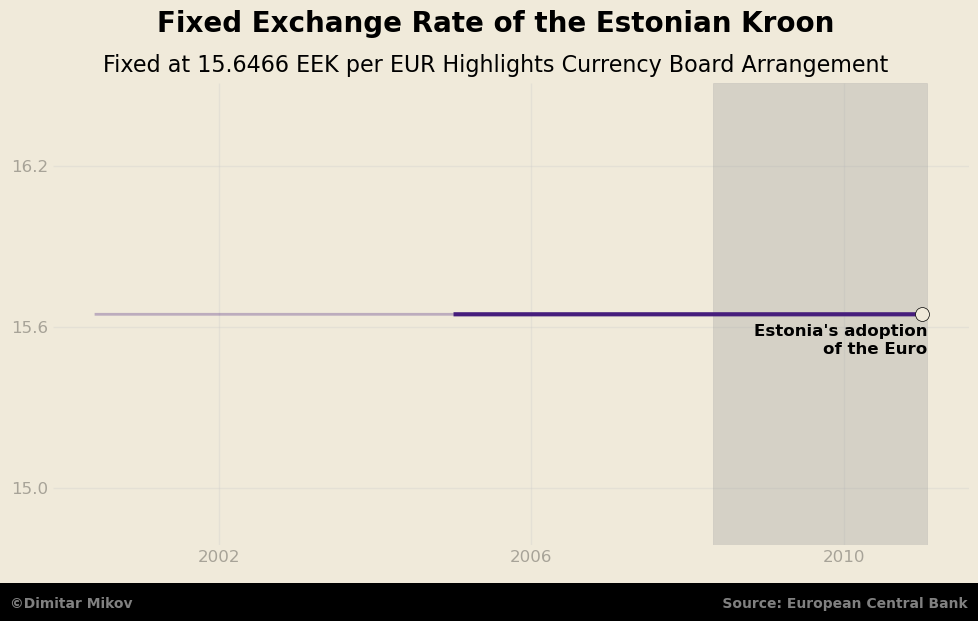

In [18]:
# Create a figure and axis with specific dimensions and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Estonian kroon exchange rate
ax.plot(estonian_kroon_cleaned['date'], estonian_kroon_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Light line to show general trend

# Hide the spines of the plot to create a cleaner look
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Add a grid with reduced opacity to improve readability
ax.grid(alpha=0.3)

# Define x-ticks at key years and format them for better readability
ax.set_xticks(['2002-01-01', '2006-01-01', '2010-01-01'])
ax.set_xticklabels(['2002', '2006', '2010'], alpha=0.3, size=12)

# Define y-ticks for specific exchange rate values and format them
ax.set_yticks([15.0, 15.6, 16.2])
ax.set_yticklabels(['15.0', '15.6', '16.2'], alpha=0.3, size=12)

# Highlight a specific range with a thicker line to emphasize the period around euro adoption
ax.plot(estonian_kroon_cleaned['date'][1537:3074], estonian_kroon_cleaned['rolling_mean_365'][1537:3074],
         color='#461d7c', linewidth=3)  # Emphasized line for the highlighted period

# Add annotation to indicate Estonia's adoption of the Euro
ax.text(15000, 15.5, 'Estonia\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Highlight the specific date of Euro adoption with a scatter plot
ax.scatter(estonian_kroon_cleaned.loc[estonian_kroon_cleaned['date'] == '2010-12-31', 'date'],
            estonian_kroon_cleaned.loc[estonian_kroon_cleaned['date'] == '2010-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=14000, xmax=15000, alpha=0.3, color='#999999')

# Add titles to provide context and highlight key observations
ax.text(11400, 16.70, 'Fixed Exchange Rate of the Estonian Kroon', size=20, weight='bold')
ax.text(11150, 16.55, 'Fixed at 15.6466 EEK per EUR Highlights Currency Board Arrangement', size=16)

# Add a footer with copyright and source information
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all plot elements are properly displayed and aligned
plt.tight_layout()

# Render the plot
plt.show()

## Estonian Kroon: Analysis of Exchange Rate Stability

### Overview

The Estonian kroon, Estonia's national currency before adopting the euro, was subject to a fixed exchange rate regime. This exchange rate was strictly pegged to a reserve currency under a currency board arrangement.

### Historical Exchange Rate Peg

According to the [Eesti Pank (Bank of Estonia)](https://www.eestipank.ee/en/museum/history-estonian-money), the Estonian kroon was pegged as follows:

- **From 20 June 1992 to 31 December 2001:** The kroon was fixed at **8 EEK = 1 DEM (German Mark)**.
- **From 1 January 2002 to 31 December 2006:** The exchange rate was fixed at **15.6466 EEK = 1 EUR (Euro)**.

This fixed rate system meant that the exchange rate of the kroon against the euro (or the German mark before 2002) remained constant throughout this period. The consistency in the exchange rate data you observed aligns with this fixed exchange rate policy.

### Data Analysis

The data for the Estonian kroon exchange rate shows:

- **Constant Value:** The exchange rate of the Estonian kroon was consistently reported as **15.6466 EEK per EUR** throughout the dataset from 1999 to 2010.
- **Implication:** This uniformity in the data reflects the fixed exchange rate regime in place. Under this system, the value of the kroon relative to the euro (and previously to the German mark) did not fluctuate, as it was pegged to these currencies.

### Conclusion

The fixed exchange rate system explains the constant value in the dataset. The Estonian kroon was pegged to the euro at a fixed rate of 15.6466 EEK per EUR, which explains the uniform exchange rate data observed. This peg was part of Estonia's strategy to stabilize its currency and ensure economic stability as it prepared for euro adoption.

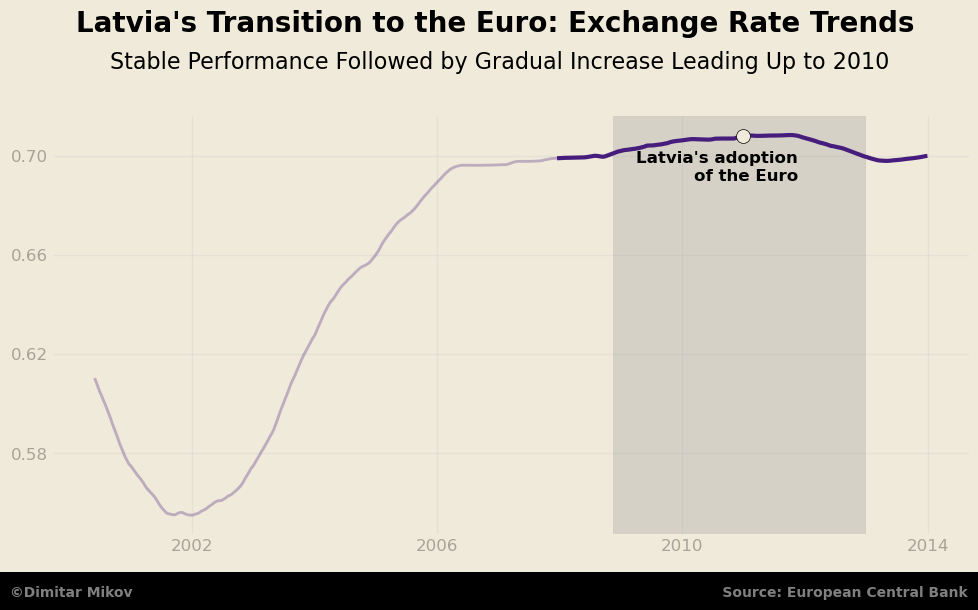

In [19]:
# Create a figure and axis with specified dimensions and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Latvian lats exchange rate
ax.plot(latvian_lats_cleaned['date'], latvian_lats_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Base trend line

# Hide the spines (borders) of the plot for a cleaner look
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Add grid lines with reduced opacity to enhance readability
ax.grid(alpha=0.3)

# Set x-ticks at key years and format them for clarity
ax.set_xticks(['2002-01-01', '2006-01-01', '2010-01-01', '2014-01-01'])
ax.set_xticklabels(['2002', '2006', '2010', '2014'], alpha=0.3, size=12)

# Set y-ticks for specific exchange rate values and format them
ax.set_yticks([0.58, 0.62, 0.66, 0.70])
ax.set_yticklabels(['0.58', '0.62', '0.66', '0.70'], alpha=0.3, size=12)

# Highlight a specific range with a thicker line to emphasize the period around euro adoption
ax.plot(latvian_lats_cleaned['date'][2295:3842], latvian_lats_cleaned['rolling_mean_365'][2295:3842],
         color='#461d7c', linewidth=3)  # Emphasized line for detailed period

# Add annotation to indicate Latvia's adoption of the Euro
ax.text(15300, 0.69, 'Latvia\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Highlight the specific date of Euro adoption with a scatter plot
ax.scatter(latvian_lats_cleaned.loc[latvian_lats_cleaned['date'] == '2010-12-31', 'date'],
            latvian_lats_cleaned.loc[latvian_lats_cleaned['date'] == '2010-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to highlight the transition period
ax.axvspan(xmin=14200, xmax=15700, alpha=0.3, color='#999999')

# Add titles to provide context and emphasize key observations
ax.text(11000, 0.75, 'Latvia\'s Transition to the Euro: Exchange Rate Trends', size=20, weight='bold')
ax.text(11200, 0.735, 'Stable Performance Followed by Gradual Increase Leading Up to 2010', size=16)

# Add a footer with copyright and source information
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all plot elements are properly displayed and aligned
plt.tight_layout()

# Render the plot
plt.show()

## Analysis of the Latvian Lats Exchange Rate Leading Up to Euro Adoption

### Overview

The Latvian Lats (LVL) displayed notable stability and fluctuations in its exchange rate against the euro (EUR) as Latvia approached the adoption of the euro. The following analysis provides insights into how the exchange rate evolved over time and how it was influenced by the transition to the euro.

### Exchange Rate Trends

**Graph Analysis:**

- **Stable Period:** From the early 2000s to around 2006, the exchange rate of the Latvian Lats remained relatively stable, with the rolling mean hovering between 0.62 and 0.66 LVL per EUR. This period demonstrates a consistent value with minor fluctuations.
  
- **Increasing Trend:** Starting around mid-2006, there was a gradual increase in the exchange rate, reaching up to 0.70 LVL per EUR by late 2010. This upward trend indicates a period of gradual devaluation or adjustment in anticipation of adopting the euro.

- **Transition Period:** The transition period, marked by a significant shift around 2010, shows an evident increase in the exchange rate. The graph highlights this transition with a pronounced rise leading up to the end of 2010, coinciding with Latvia’s adoption of the euro.

### Conclusion

The analysis of the Latvian Lats reveals a well-managed transition to the euro, with a stable exchange rate maintained through most of the period. The gradual increase in the exchange rate as the adoption date approached reflects strategic adjustments made to align with the new currency standards. This stable yet slightly increasing trend underscores Latvia’s preparedness and controlled approach in transitioning to the euro.

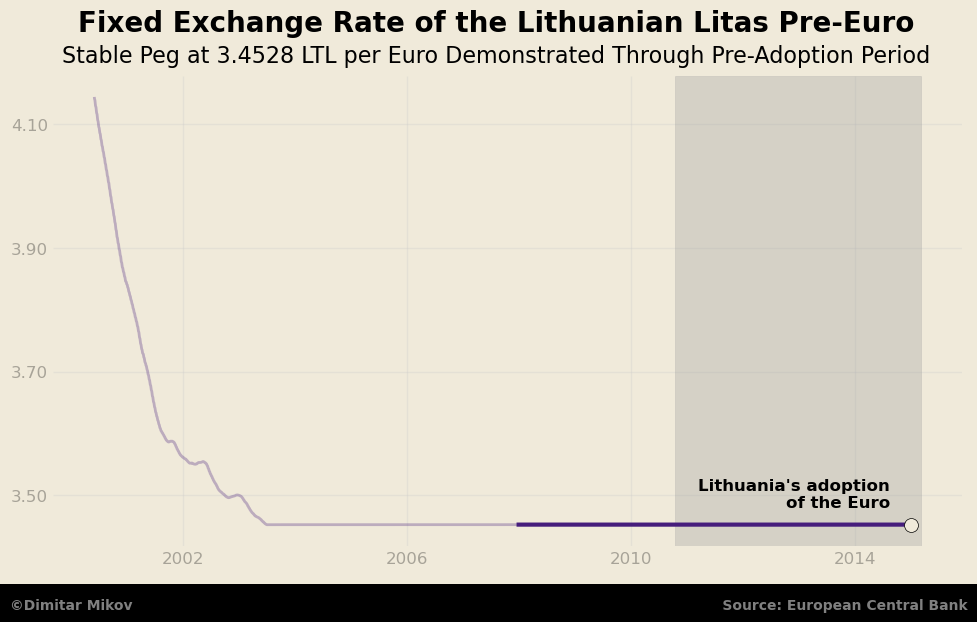

In [20]:
# Create a figure and axis with specified dimensions and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#f0eada')

# Plot the 365-day rolling mean of the Lithuanian litas exchange rate
ax.plot(lithuanian_litas_cleaned['date'], lithuanian_litas_cleaned['rolling_mean_365'],
        color='#461d7c', linewidth=2, alpha=0.3)  # Base trend line for the entire period

# Hide the spines (borders) of the plot to enhance visual appeal
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Set the background color of the plot area
ax.set_facecolor('#f0eada')

# Add grid lines with reduced opacity to improve readability without clutter
ax.grid(alpha=0.3)

# Define x-ticks for key years and format their labels
ax.set_xticks(['2002-01-01', '2006-01-01', '2010-01-01', '2014-01-01'])
ax.set_xticklabels(['2002', '2006', '2010', '2014'], alpha=0.3, size=12)

# Define y-ticks for specific exchange rate values and format their labels
ax.set_yticks([3.50, 3.70, 3.90, 4.10])
ax.set_yticklabels(['3.50', '3.70', '3.90', '4.10'], alpha=0.3, size=12)

# Highlight the specific period leading up to the Euro adoption with a thicker line
ax.plot(lithuanian_litas_cleaned['date'][2295:4097], lithuanian_litas_cleaned['rolling_mean_365'][2295:4097],
         color='#461d7c', linewidth=3)  # Emphasized line for the period near adoption

# Annotate the plot to mark Lithuania's adoption of the Euro
ax.text(16300, 3.48, 'Lithuania\'s adoption\nof the Euro', weight='bold', color='#000000', ha='right', size=12)

# Highlight the specific date of Euro adoption with a scatter plot
ax.scatter(lithuanian_litas_cleaned.loc[lithuanian_litas_cleaned['date'] == '2014-12-31', 'date'],
            lithuanian_litas_cleaned.loc[lithuanian_litas_cleaned['date'] == '2014-12-31', 'rolling_mean_365'],
            color='#f0eada', edgecolor='black', s=100, zorder=5)  # Highlighted point for adoption date

# Add a shaded vertical region to emphasize the transition period
ax.axvspan(xmin=14900, xmax=16500, alpha=0.3, color='#999999')

# Add titles to provide context and highlight key observations
ax.text(11000, 4.25, 'Fixed Exchange Rate of the Lithuanian Litas Pre-Euro', size=20, weight='bold')
ax.text(10900, 4.2, 'Stable Peg at 3.4528 LTL per Euro Demonstrated Through Pre-Adoption Period', size=16)

# Add a footer with copyright and source information for the plot
plt.figtext(0.02, -0.03, '©Dimitar Mikov' + ' '*121 + 'Source: European Central Bank', 
            ha='left', va='center', fontsize=10, color='grey', fontweight='bold', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Adjust layout to ensure all plot elements are properly displayed and aligned
plt.tight_layout()

# Render the plot
plt.show()

## Analysis of the Lithuanian Litas Exchange Rate Relative to the Euro

### Overview

The Lithuanian Litas (LTL) exchange rate relative to the euro (EUR) exhibits a unique trend due to its fixed peg established in 2002. This analysis explores the behavior of the Litas exchange rate leading up to its adoption of the euro on January 1, 2015.

### Key Findings

1. **Fixed Exchange Rate Post-2002**:
   - On February 2, 2002, the Lithuanian Litas was pegged to the euro at a fixed rate of 3.4528 LTL to 1 EUR. This peg was intended to maintain currency stability and was not expected to change.
   - As a result, from 2002 onwards, the exchange rate of the Litas to the euro remained constant at 3.4528. This is clearly illustrated in the graph where the rolling mean of the exchange rate stabilizes around this value.

2. **Pre-Peg Period**:
   - Prior to the peg, the Litas experienced fluctuations in its exchange rate. The data from 1999 to 2002 shows variability, with the rate ranging from approximately 3.30 to 3.45 LTL per euro.
   - The transition to a fixed exchange rate in 2002 was a significant policy move aimed at aligning the Lithuanian Litas with the euro, promoting economic stability, and preparing for future integration into the Eurozone.

3. **Stability Leading Up to Euro Adoption**:
   - Following the implementation of the peg, the exchange rate of the Litas remained remarkably stable, as shown by the rolling mean values from 2002 to 2014. This stability reflects the successful maintenance of the currency peg.
   - The graph highlights this stability with a consistent line representing the rolling mean of the exchange rate, underscoring the fixed nature of the peg.

4. **Transition to the Euro**:
   - On January 1, 2015, the Lithuanian Litas was officially replaced by the euro. The graph's shaded region indicates this transition period, where the Litas ceased to be the national currency.
   - The stability observed in the Litas exchange rate in the years leading up to the euro adoption illustrates the effectiveness of the peg in preparing the currency and economy for this transition.

### Comparative Insights

- **Consistency Across Countries**:
  - Similar to other countries that adopted the euro, Lithuania maintained a fixed exchange rate to ensure stability and predictability as the adoption date approached. This approach aligns with the broader strategy observed in other Eurozone countries.

- **Impact on Currency Stability**:
  - The fixed exchange rate effectively minimized currency fluctuations, contributing to economic stability and predictability. This was crucial for both economic planning and public confidence in the transition to the euro.

## Conclusion

This project aimed to analyze and visualize the exchange rate trends of national currencies against the euro for seven countries that adopted the euro between 1999 and 2024. By examining historical exchange rates and their evolution leading up to the euro adoption, we sought to understand how each currency performed and how these trends compared across different nations.

The analysis revealed that most countries maintained a stable exchange rate against the euro prior to adoption, with several adopting a fixed peg well in advance. This approach ensured a smooth transition and minimal volatility. Overall, the consistent pre-adoption policies across these countries illustrate effective currency management strategies and highlight the broader economic stability achieved during the transition to the euro.